## Maria Harrison
### CS 8395-51- Introduction to Quantum Computing
#### Final Project: Shor’s Algorithm, Bernstein-Vazirani, and Deutsch-Josza Algorithm: A Deep Dive

## BERNSTEIN VAZIRANI ALGORITHM

In [1]:
from __future__ import print_function
import numpy as np
import sys
import random
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

In [2]:
def getRandomNumberHigh():
    decimal_num = random.randint(1, 1000)
    print("Random number HIGH generated in decimal format:", decimal_num)
    print("Random number in BINARY format:", bin(decimal_num).replace("0b", ""))
    return decimal_num

def getRandomNumberQubits():
    n_qub = random.randint(1, 39)
    print("Random number of qubits:", n_qub)
    return n_qub

In [3]:
r = getRandomNumberHigh()
n_qubits = getRandomNumberQubits()


Random number HIGH generated in decimal format: 108
Random number in BINARY format: 1101100
Random number of qubits: 16


In [4]:
# sanitation check that the hidden number can be represented with n number of qubits
secret_num = r %2**(n_qubits)

In [5]:
'''
    create a quantum circuit to implelemtn bernstein vazirani algorithm
    
    parameters
        oracle: quantum circuit
        n: length of secret string

    return
       bernstein vazirani algorithm as a quantum circ

'''
def bernstein_vazirani_alg(r, n):
    qr = QuantumRegister(n+1)
    cr = ClassicalRegister(n)
    bvCirq = QuantumCircuit(qr, cr, name ="BernsteinVazirani")
    
    # setting output x gate qubits
    bvCirq.x(n)
    
    # setting output h gate qubits
    bvCirq.h(n)
    
    # set up input register and setting h gate
    for qubit in range(n):
        bvCirq.h(qubit)
        
    bvCirq.barrier()
    
    # add return from oracle() func to circuit
    # bvCirq.append(oracle, range(n+1))
    for i in range(n):
        if (r & (1 <<i)):
            bvCirq.z(qr[i])
        else:
            bvCirq.id(qr[i])
            
    bvCirq.barrier()
    
    # set h gates again before measuring
    for q in range(n):
        bvCirq.h(qr[q])
    
    # measure perforamnce
    for i in range(n):
        bvCirq.measure(i, i)
    
    return bvCirq

In [6]:
#Return Oracle Circuit
qCirc = bernstein_vazirani_alg(secret_num, n_qubits)

/opt/homebrew/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


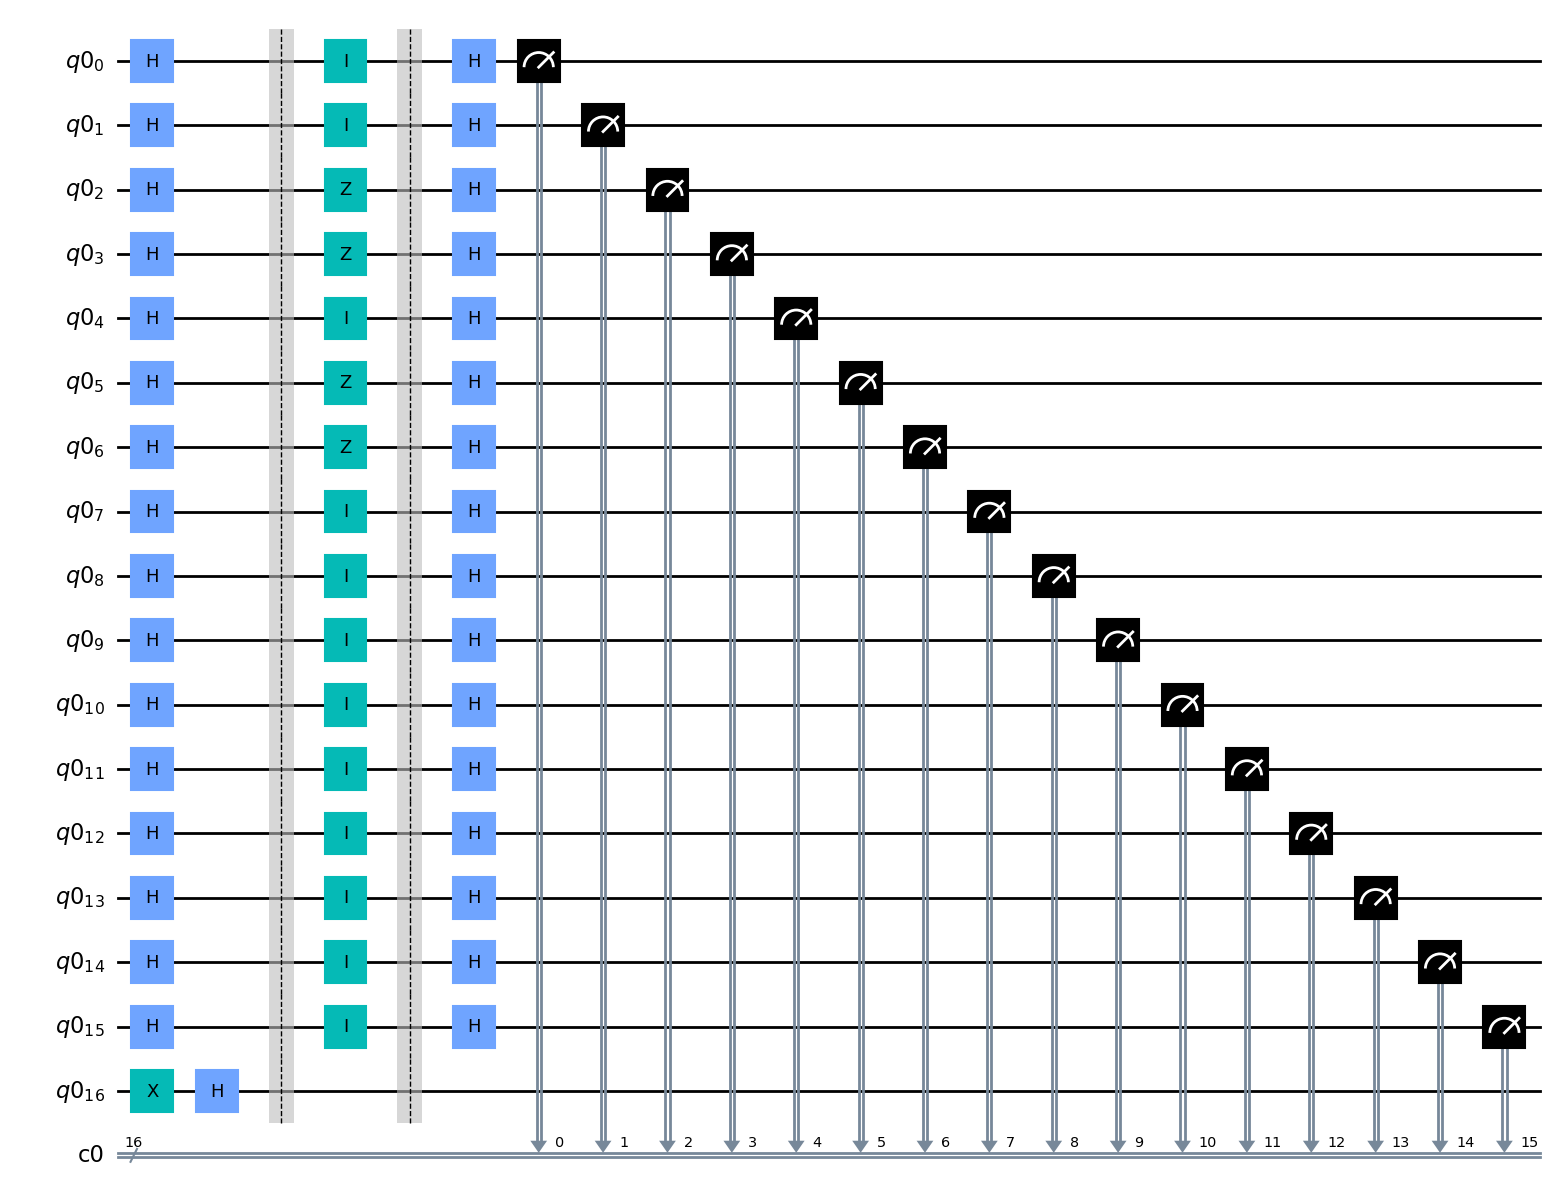

In [7]:
qCirc.draw('mpl')

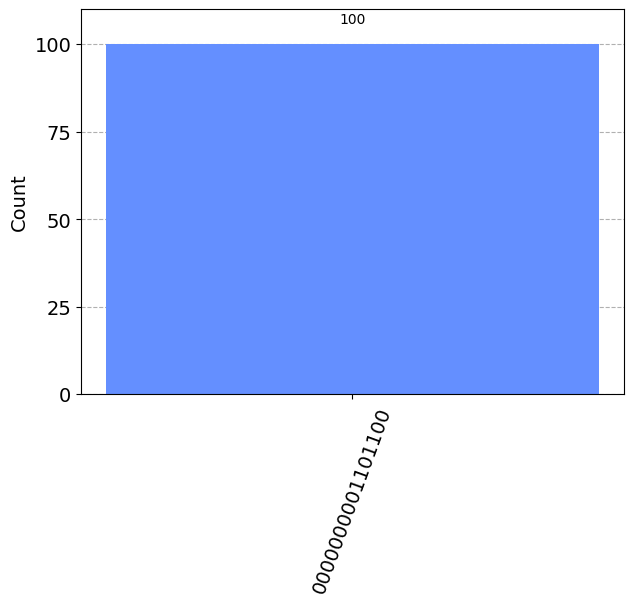

In [8]:
''' 
    Running Bernstein Vazirani Algorithm
'''
# creating quantum simulator 
simulator = Aer.get_backend('qasm_simulator')
shots = 100
# running quantum circuit on simulator and calling .result() to get results of circuit when it runs
result = execute(qCirc, backend=simulator, shots=shots).result()

#printing histogram result
plot_histogram(result.get_counts(qCirc))


In [9]:
guess = list(result.get_counts().keys())
print(guess)

['0000000001101100']


In [10]:
def isGuessCorrect(secret_num, guess):
    if (format(guess == secret_num)):
        print("Yay, the guess was CORRECT!")
    else:
        print("Sorry, the guess was NOT correct :(")

In [11]:
def printOutputAndScore(r, guess, secret_num):
    print("Random number generated at the beginning and converted to secret string :", r)
    print("Secret string:", secret_num)
    print("Guess:", guess)

    isGuessCorrect(secret_num, guess)
    
printOutputAndScore(r, guess, secret_num)

Random number generated at the beginning and converted to secret string : 108
Secret string: 108
Guess: ['0000000001101100']
Yay, the guess was CORRECT!
